<a href="https://colab.research.google.com/github/Arushi-dev/Geopolitical_Analysis/blob/main/Geopolitical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Annual Defence Spending of countries.txt to Annual Defence Spending of countries (1).txt
Saving Political Atomosphere within countries.txt to Political Atomosphere within countries.txt
Saving Strategic Relations between countries.txt to Strategic Relations between countries (1).txt


Loaded Defense Budget DataFrame:
    Country  Defense Budget (Billion $)
0        US                       801.0
1     China                       293.0
2     India                        76.0
3        UK                        68.0
4    Russia                        65.0
5   Germany                        56.0
6     Japan                        54.0
7  Pakistan                        12.0
8   Hungary                         8.0
Loaded Political Structure DataFrame:
    Country Political Structure
0        US    Strong democracy
1     China    Strong communism
2     India    Strong democracy
3        UK    Strong democracy
4    Russia      Weak democracy
5   Germany    Strong democracy
6     Japan    Strong democracy
7  Pakistan      Weak democracy
8   Hungary      Weak communism
Loaded Strategic Relations DataFrame:
   Country 1 Country 2      Relationship
0    Hungary    Russia       Weak Allies
1         US        UK     Strong Allies
2      India  Pakistan  Strong Adversary
3      

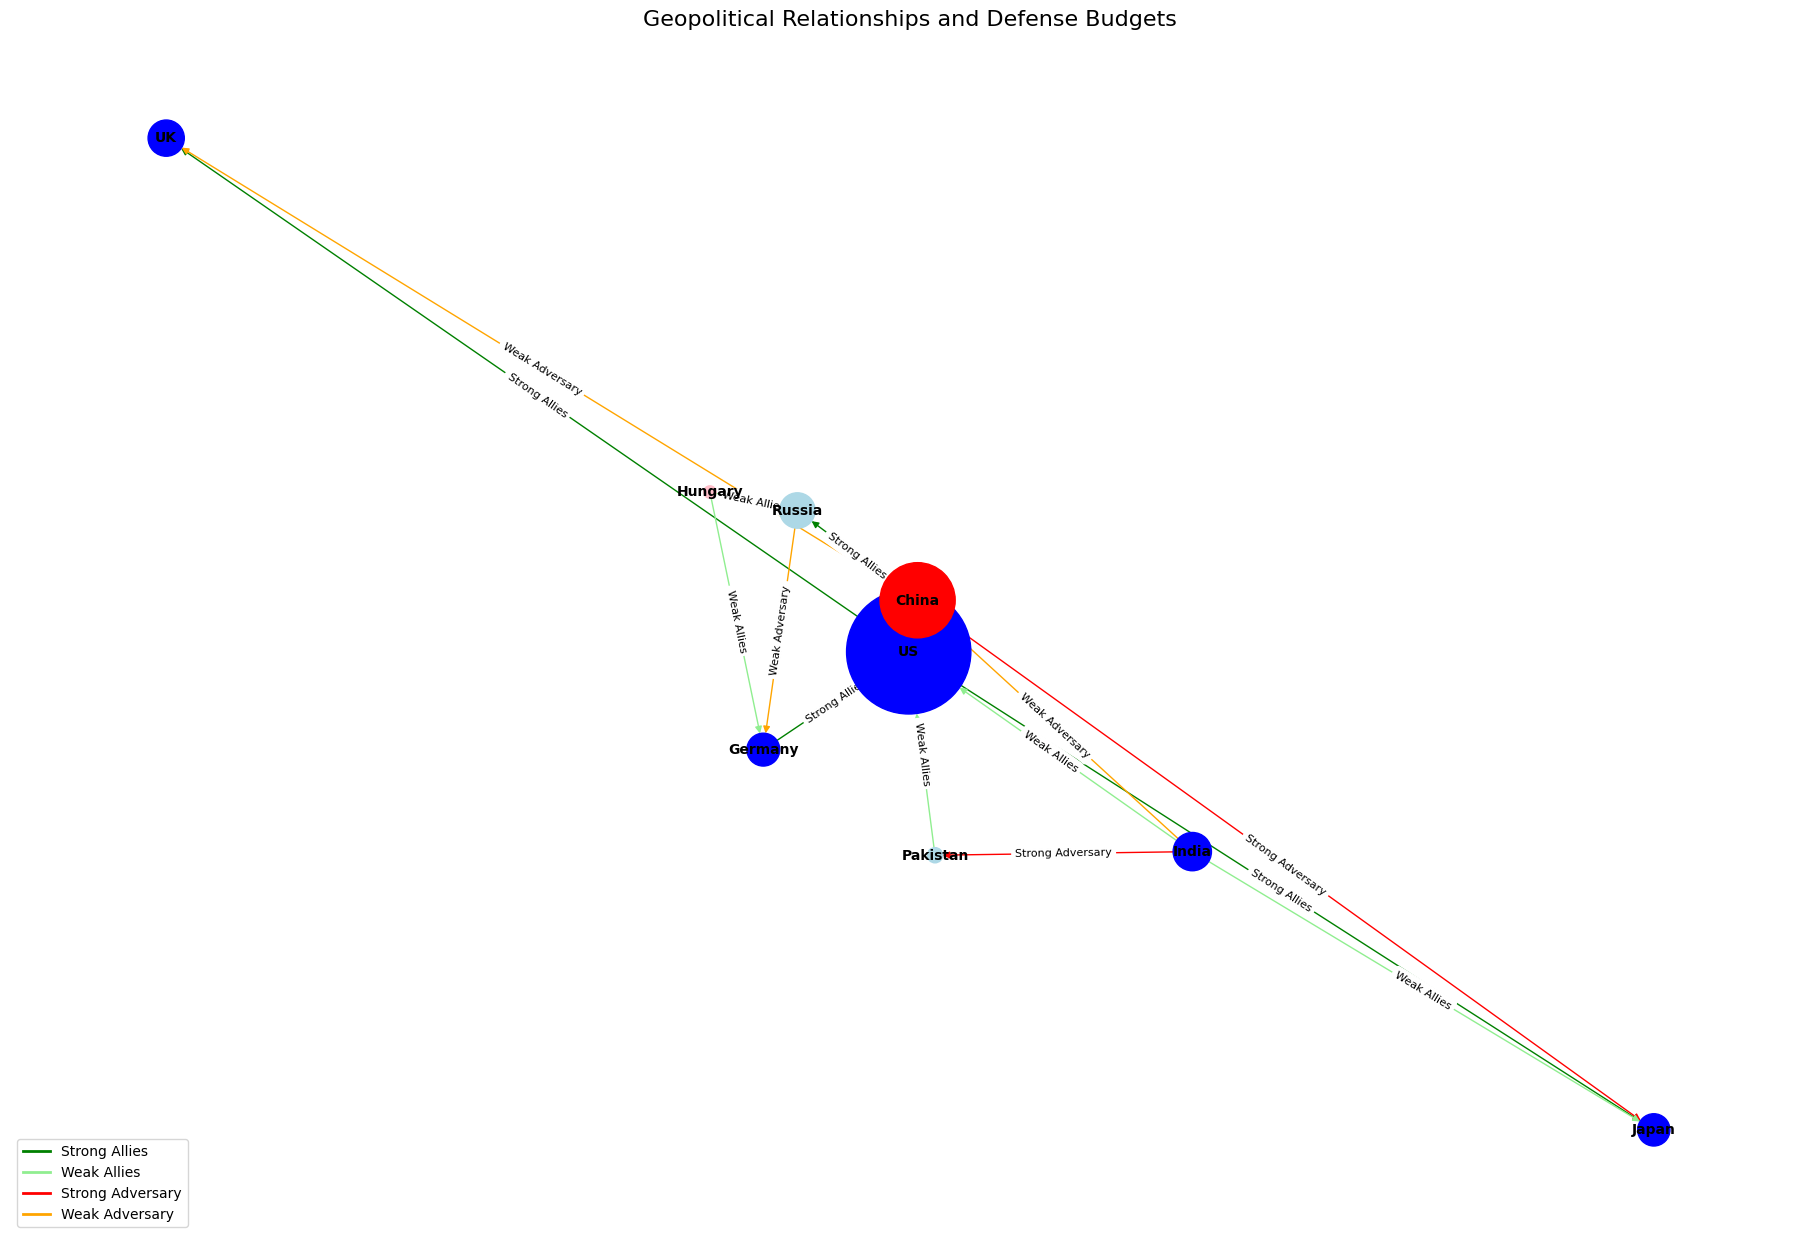

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# File paths
defense_budget_file = "Annual Defence Spending of countries.txt"
political_structure_file = "Political Atomosphere within countries.txt"
strategic_relations_file = "Strategic Relations between countries.txt"

# Parse Defense Budgets
try:
    with open(defense_budget_file, 'r') as file:
        defense_budgets = []
        for line in file:
            line = line.strip()  # Remove leading/trailing whitespace
            if line:  # Skip empty lines
                try:
                    # Use regex to handle inconsistent spacing and formatting
                    import re
                    match = re.match(r"^(.*)\s(\d+)\s?bn\s?\$", line)
                    if match:
                        country = match.group(1).strip()
                        budget_value = float(match.group(2))
                        defense_budgets.append({"Country": country, "Defense Budget (Billion $)": budget_value})
                    else:
                        print(f"Skipping malformed line in defense budgets: {line}")
                except ValueError as e:
                    print(f"Error processing line: {line} - {e}")
    defense_budget_df = pd.DataFrame(defense_budgets)
    print("Loaded Defense Budget DataFrame:")
    print(defense_budget_df)
except Exception as e:
    print(f"Error processing defense budget file: {e}")
    raise

# Parse Political Structures
try:
    with open(political_structure_file, 'r') as file:
        political_structures = []
        for line in file:
            line = line.strip()  # Remove leading/trailing whitespace
            if line:  # Skip empty lines
                try:
                    country, structure = line.split(" -> ")
                    political_structures.append({"Country": country.strip(), "Political Structure": structure.strip()})
                except ValueError as e:
                    print(f"Skipping malformed line in political structures: {line} - {e}")
    political_structure_df = pd.DataFrame(political_structures)
    print("Loaded Political Structure DataFrame:")
    print(political_structure_df)
except Exception as e:
    print(f"Error processing political structure file: {e}")
    raise

# Parse Strategic Relations
try:
    with open(strategic_relations_file, 'r') as file:
        relations = []
        for line in file:
            line = line.strip()  # Remove leading/trailing whitespace
            if line:  # Skip empty lines
                try:
                    data = line.strip("[]").split(", ")
                    relations.append({"Country 1": data[0].strip(), "Country 2": data[1].strip(), "Relationship": data[2].strip()})
                except ValueError as e:
                    print(f"Skipping malformed line in relations: {line} - {e}")
    relations_df = pd.DataFrame(relations)
    print("Loaded Strategic Relations DataFrame:")
    print(relations_df)
except Exception as e:
    print(f"Error processing strategic relations file: {e}")
    raise

# Merge DataFrames
try:
    merged_df = pd.merge(defense_budget_df, political_structure_df, on="Country", how="inner")
    print("Merged DataFrame:")
    print(merged_df)
except Exception as e:
    print(f"Error merging DataFrames: {e}")
    raise

# Create a graph
G = nx.DiGraph()

# Add nodes with attributes
for _, row in merged_df.iterrows():
    G.add_node(row['Country'], budget=row['Defense Budget (Billion $)'], structure=row['Political Structure'])

# Add edges with relationships
for _, row in relations_df.iterrows():
    if row['Country 1'] in G.nodes and row['Country 2'] in G.nodes:
        G.add_edge(row['Country 1'], row['Country 2'], relation=row['Relationship'])

# Node size based on defense budget
node_sizes = [G.nodes[node]["budget"] * 10 for node in G.nodes]

# Node color based on political structure
structure_colors = {"Strong democracy": "blue", "Weak democracy": "lightblue",
                    "Strong communism": "red", "Weak communism": "pink"}
node_colors = [structure_colors.get(G.nodes[node]["structure"], "gray") for node in G.nodes]

# Edge color based on relationship
edge_colors = {"Strong Allies": "green", "Weak Allies": "lightgreen",
               "Strong Adversary": "red", "Weak Adversary": "orange"}
edge_color_map = [edge_colors.get(G[u][v]["relation"], "gray") for u, v in G.edges]

# Draw the graph
plt.figure(figsize=(18, 12))
pos = nx.spring_layout(G, seed=42)  # Layout for consistent positioning
nx.draw(
    G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors,
    edge_color=edge_color_map, font_size=10, font_weight="bold"
)

# Add edge labels
edge_labels = nx.get_edge_attributes(G, "relation")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Add legend for relationships
relation_legend = [
    plt.Line2D([0], [0], color="green", lw=2, label="Strong Allies"),
    plt.Line2D([0], [0], color="lightgreen", lw=2, label="Weak Allies"),
    plt.Line2D([0], [0], color="red", lw=2, label="Strong Adversary"),
    plt.Line2D([0], [0], color="orange", lw=2, label="Weak Adversary"),
]
plt.legend(handles=relation_legend, loc="lower left")

plt.title("Geopolitical Relationships and Defense Budgets", fontsize=16)
plt.show()
